# Librerías y cosas útiles

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import agente_taxi 
import ambiente_taxi 

import sys 
sys.path.append('..')

import learner_qlearning 

In [72]:
from matplotlib import pyplot as plt
import matplotlib.lines as lines
import pandas as pd 
import numpy as np 
import pickle 

In [15]:
def get_right_orger_matrix(matrix: np.array) -> np.array:
    dimension = len(matrix)
    right_order_matrix = np.zeros((dimension, dimension))

    for i in range(dimension): 
        for j in range(dimension): 
            right_order_matrix[i,j] = matrix[dimension - i - 1, j]
    return right_order_matrix

In [87]:
def get_values_and_policy_from_qvalues(q_values):
    values = {}
    policy = {}

    state_action_value = [(k[0], k[1], v) for k, v in q_values.items()]
    df = pd.DataFrame(state_action_value, columns = ['state', 'action', 'qvalue'])

    for s in df.state.unique():
        df_s = df.loc[(df.state == s)]
        qvalue_s = df_s.loc[df_s.qvalue == df_s.qvalue.max()].iloc[0].qvalue
        action_s = df_s.loc[df_s.qvalue == df_s.qvalue.max()].iloc[0].action
        policy[s] = action_s 
        values[s] = round(qvalue_s,2) 
        
    return values, policy

In [85]:
def paint_board_with_policy(board, values, policy = True, path = None):
    dimension = len(board)

    fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize=(dimension+2, 2*dimension))

    for k in range(2):
        ax = axes[k]
        ax.set_xlim(0,dimension)
        ax.set_ylim(0,dimension)

        ax.grid(which="both", color="black", linestyle='-', linewidth=0.2)

        ax.add_artist(lines.Line2D([1, 1], [0, 2], color = 'black',linewidth=2))
        ax.add_artist(lines.Line2D([2, 2], [3, 5], color = 'black',linewidth=2))
        ax.add_artist(lines.Line2D([3, 3], [0, 2], color = 'black',linewidth=2))

        ax.set_xticks(range(dimension))
        ax.set_yticks(range(dimension), range(dimension, 0, -1))
        for i in range(dimension):
            for j in range(dimension):
                try: 
                    if policy:
                        action = values[i,j,k]
                        symbol = ''
                        if action == 'up': symbol = '↑'
                        elif action == 'down': symbol = '↓'
                        elif action == 'right': symbol = '→'
                        elif action == 'left': symbol = '←'
                        elif action == 'recogerPasajero': symbol = 'R'
                        elif action == 'dejarPasajero': symbol = 'D'

                        fontsize = 'xx-large'
                    
                    else: 
                        fontsize = 'x-large'
                        symbol = round(values[i,j,k],2)

                    if k == 1:
                        ax.text(j + 0.4,dimension  -1 - i +0.4, symbol, fontsize = fontsize)
                        ax.set_title('Política para dejar al pasajero')
                    else: 
                        ax.text(j + 0.4,dimension -1 - i +0.4, symbol, fontsize = fontsize)
                        ax.set_title('Política para recoger el pasajero')

                except: continue 

    fig.tight_layout()
    if not path is None: plt.savefig(path)
    plt.show()
    plt.close()

    return fig 

# Inicialización de valores

In [4]:
env = ambiente_taxi.TaxiAmbiente()
agent = agente_taxi.TaxiAgente(env)

In [5]:
learner = learner_qlearning.QLearning( env = env, agent = agent,  
                            epsilon = 0.8, alpha = 0.4, gamma = 0.9,
                            decrease_alpha = 0.01, exploration_decreasing_decay = 0.01,
                            num_episodes_batch = 500)

# Q - learning

In [6]:
epsilons, alphas, rewards, steps = learner.qlearning()

--> Episode 10. Reward: -174. Steps: 77 Epsilon: 0.8. Alpha: 0.4
--> Episode 20. Reward: -34. Steps: 22 Epsilon: 0.8. Alpha: 0.4
--> Episode 30. Reward: -404. Steps: 201 Epsilon: 0.8. Alpha: 0.4
--> Episode 40. Reward: -274. Steps: 90 Epsilon: 0.8. Alpha: 0.4
--> Episode 50. Reward: -74. Steps: 33 Epsilon: 0.8. Alpha: 0.4
--> Episode 60. Reward: -324. Steps: 121 Epsilon: 0.8. Alpha: 0.4
--> Episode 70. Reward: -154. Steps: 51 Epsilon: 0.8. Alpha: 0.4
--> Episode 80. Reward: -94. Steps: 51 Epsilon: 0.8. Alpha: 0.4
--> Episode 90. Reward: -194. Steps: 74 Epsilon: 0.8. Alpha: 0.4
--> Episode 100. Reward: -214. Steps: 72 Epsilon: 0.8. Alpha: 0.4
--> Episode 110. Reward: -244. Steps: 100 Epsilon: 0.8. Alpha: 0.4
--> Episode 120. Reward: -84. Steps: 46 Epsilon: 0.8. Alpha: 0.4
--> Episode 130. Reward: -274. Steps: 125 Epsilon: 0.8. Alpha: 0.4
--> Episode 140. Reward: -284. Steps: 92 Epsilon: 0.8. Alpha: 0.4
--> Episode 150. Reward: -114. Steps: 52 Epsilon: 0.8. Alpha: 0.4
--> Episode 160. Re

# Resultados

In [8]:
with open('results/results_taxi.pickle', 'wb') as handle:
    pickle.dump((learner, env, agent, epsilons, alphas, rewards, steps), handle, protocol=pickle.HIGHEST_PROTOCOL)

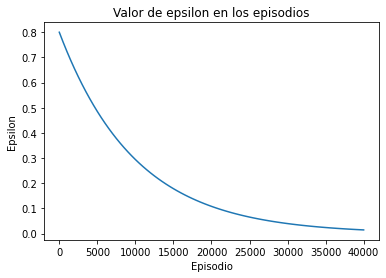

In [9]:
plt.plot(range(1,len(epsilons)*500, 500), epsilons) 
plt.title('Valor de epsilon en los episodios')
plt.xlabel('Episodio')
plt.ylabel('Epsilon')
plt.savefig('results/epsilon.png')

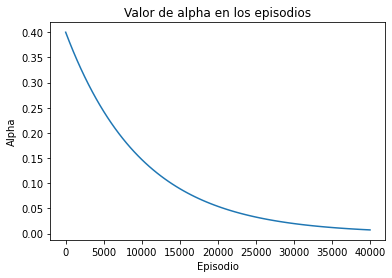

In [10]:
plt.plot(range(1,len(epsilons)*500, 500), alphas)
plt.title('Valor de alpha en los episodios')
plt.xlabel('Episodio')
plt.ylabel('Alpha')
plt.savefig('results/alpha.png')

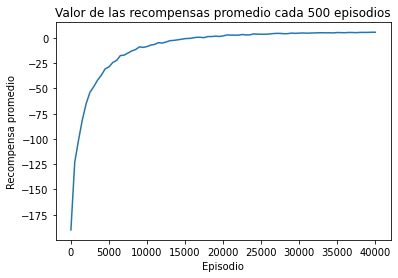

In [11]:
plt.plot(range(1,len(epsilons)*500, 500), rewards)
plt.title('Valor de las recompensas promedio cada 500 episodios')
plt.xlabel('Episodio')
plt.ylabel('Recompensa promedio')
plt.savefig('results/recompensa_promedio.png')

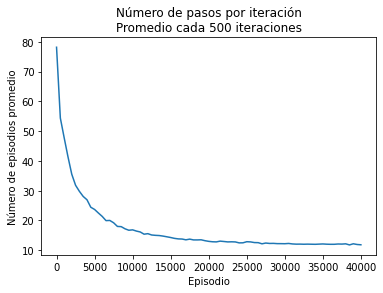

In [12]:
plt.plot(range(1,len(epsilons)*500, 500), steps)
plt.title('Número de pasos por iteración\nPromedio cada 500 iteraciones')
plt.xlabel('Episodio')
plt.ylabel('Número de episodios promedio')
plt.savefig('results/numero_pasos_promedio.png')

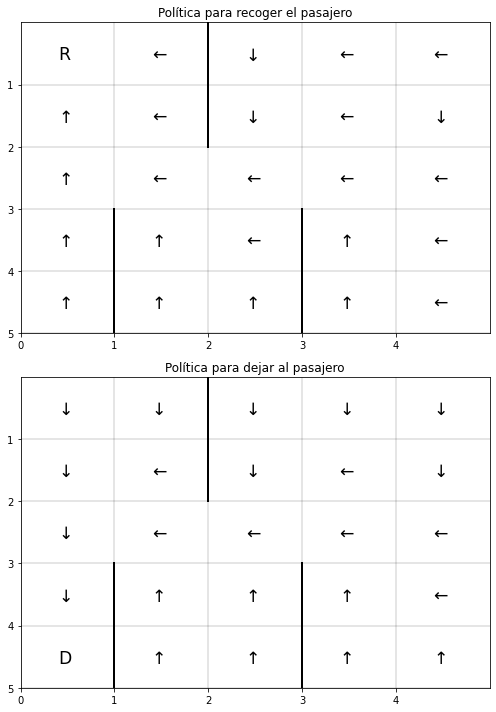

In [88]:
values, policy = get_values_and_policy_from_qvalues(learner.Q)
_ = paint_board_with_policy(np.zeros((5,5)),policy, path = 'results/policy')

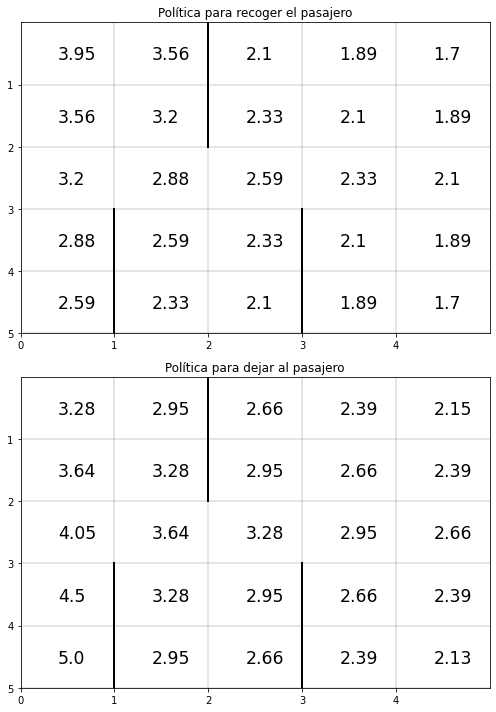

In [90]:
_ = paint_board_with_policy(np.zeros((5,5)),values, policy=False, path = 'results/values')